# Alexnetモデル　テスト用

## alexnet_cifar10_keras_1.jpynbと同様な作り方

keras tensorflow .__version  2.6.0

In [1]:
import keras
import tensorflow
keras.__version__
tensorflow.__version__

'2.6.0'

このプログラムでは、前にエラーが出てしまっていた為、直っているかどうかを確認するためにエポック数10で試してみている。

理由は、エポック数を上げると時間がかかってしまう為

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.initializers import TruncatedNormal, Constant
#追加train.py
from tensorflow.keras import utils as np_utils
from tensorflow.keras.optimizers import SGD 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator


#alexnet_cifar10.py
def conv2d(filters, kernel_size, strides=(1, 1), padding='same', bias_init=1, **kwargs):
    trunc = TruncatedNormal(mean=0.0, stddev=0.01)
    cnst = Constant(value=bias_init)
    return Conv2D(
        filters, kernel_size, strides=strides, padding=padding,
        activation='relu', kernel_initializer=trunc, bias_initializer=cnst, **kwargs
    )   

def dense(units, activation='tanh'):
    trunc = TruncatedNormal(mean=0.0, stddev=0.01)
    cnst = Constant(value=1)
    return Dense(
        units, activation=activation,
        kernel_initializer=trunc, bias_initializer=cnst,
    )   

def AlexNet(image_size, channel, num_classes):
    model = Sequential()

    #conv1
    model.add(conv2d(96, 3, bias_init=0, input_shape=(image_size, image_size, channel)))
    #pool1
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    #conv2
    model.add(conv2d(256, 5)) 
    #pool2
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    #conv3
    model.add(conv2d(384, 3, bias_init=0))
    #conv4
    model.add(conv2d(384, 3)) 
    #conv5
    model.add(conv2d(256, 3)) 
    #pool5
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    #fc6
    model.add(Flatten())
    model.add(dense(1000))
    model.add(Dropout(0.5))
    #fc7
    model.add(dense(1000))
    model.add(Dropout(0.5))

    #fc8
    model.add(dense(num_classes, activation='softmax'))
    
    return model

#train.py

batch_size = 128 
num_classes = 10
epochs = 10
image_size = 32
channel = 3 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

model = AlexNet(image_size, channel, num_classes)
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

train_gen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                width_shift_range=4.0/32.0, height_shift_range=4.0/32.0)
test_gen = ImageDataGenerator(rescale=1.0/255)

history = model.fit_generator(train_gen.flow(x_train, y_train, batch_size, shuffle=True),
                        steps_per_epoch=x_train.shape[0]//batch_size,
                        validation_data=test_gen.flow(x_test, y_test, batch_size, shuffle=False),
                        validation_steps=x_test.shape[0]//batch_size,
                        max_queue_size=5, epochs=epochs)

170508288/170498071 [==============================] - 5s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 96)        2688      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         8

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
390/390 [==============================] - 78s 116ms/step - loss: 2.1288 - accuracy: 0.1761 - val_loss: 2.3045 - val_accuracy: 0.1001
Epoch 2/10
390/390 [==============================] - 44s 112ms/step - loss: 1.7450 - accuracy: 0.3224 - val_loss: 1.7976 - val_accuracy: 0.3320
Epoch 3/10
390/390 [==============================] - 44s 112ms/step - loss: 1.5104 - accuracy: 0.4309 - val_loss: 1.6124 - val_accuracy: 0.3925
Epoch 4/10
390/390 [==============================] - 44s 112ms/step - loss: 1.3214 - accuracy: 0.5134 - val_loss: 1.3149 - val_accuracy: 0.5141
Epoch 5/10
390/390 [==============================] - 44s 112ms/step - loss: 1.1893 - accuracy: 0.5686 - val_loss: 1.1484 - val_accuracy: 0.5893
Epoch 6/10
390/390 [==============================] - 43s 111ms/step - loss: 1.0850 - accuracy: 0.6087 - val_loss: 1.1577 - val_accuracy: 0.5932
Epoch 7/10
390/390 [==============================] - 44s 112ms/step - loss: 1.0010 - accuracy: 0.6427 - val_loss: 1.0665 - val_ac

ここで作成したモデルをセーブする。

今回作成したエポック数10　変更次元数1000

モデル名は、alexnet_cifar10_1000_2.h5とする

In [2]:
model.save('alexnet_cifar10_1000_2.h5')

historyの中身を確認

In [3]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

学習の結果を図にして表示する

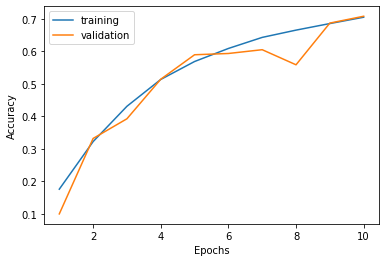

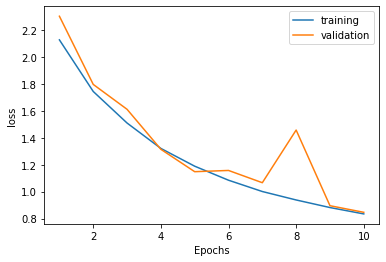

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.plot(range(1, epochs+1), history.history['accuracy'], label="training")
plt.plot(range(1, epochs+1), history.history['val_accuracy'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(range(1, epochs+1), history.history['loss'], label="training")
plt.plot(range(1, epochs+1), history.history['val_loss'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


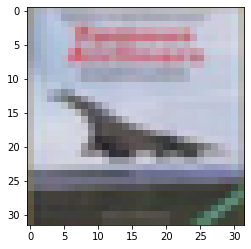

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('test_00003.png')
imgplot = plt.imshow(img)

In [6]:
print(img.shape)

(32, 32, 3)


## 画像のサイズをモデルに合わせて，リサイズ

In [9]:
from keras.preprocessing import image
import numpy as np
#ターゲット(画像)へのローカルパス
img_path = "/content/test_00003.png"

#画像を読み込む　:imgはサイズが224*224のPIL画像(Pythonで画像を処理するためのライブラリ)
img = image.load_img(img_path, target_size=(32,32))

#xは形状が(224,224，3)のfloat32型のNumPy配列
x = image.img_to_array(img)

#この配列がサイズが(1,224,224,3)のバッチに変換するために次元を追加
x = np.expand_dims(x, axis=0)

#予測ベクトルを人が読める形にデコード
preds = model.predict(x)

In [10]:
preds

array([[1.0793200e-01, 1.5260830e-03, 1.3088951e-01, 1.8095357e-02,
        8.5100599e-02, 5.3467009e-02, 8.5518761e-03, 5.9004092e-01,
        4.4258934e-04, 3.9540585e-03]], dtype=float32)

ここでは、指定した層すべてが見れるようになっている。

In [16]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:15]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [17]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(x)

## すべての層の予測ベクトルを出してしまった場合
全部の層の予測ベクトルを出すことができました。
しかし、特定の層だけを指定してベクトルを出すことができていない。


In [18]:
activations

[array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          ...,
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 3.293731  ,  0.        ,  1.7980597 , ...,  0.        ,
            0.        ,  0.        ]],
 
         [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            8.086981  ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           13.903143  ,  0.        ],
          ...,
          [ 0

## 一つの層だけから予測ベクトルの取得

15層目から

In [20]:
from keras import models

one_faive_layer = activations[14]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [21]:
one_faive_layer

array([[ 0.9005332 ,  0.897356  ,  0.6992778 ,  0.7505653 ,  0.7841861 ,
         0.48129764,  0.78195715,  0.79866785,  0.15057443,  0.9581016 ,
         0.7458486 ,  0.47943595,  0.7456996 ,  0.7676194 ,  0.57319415,
         0.8937168 ,  0.7828265 ,  0.7451591 ,  0.75067216,  0.7961135 ,
         0.90450215,  0.61618096,  0.85757774,  0.5142083 ,  0.505436  ,
         0.9430642 ,  0.87376493,  0.64760447,  0.8774654 ,  0.8730709 ,
         0.758731  ,  0.7010532 ,  0.8109056 ,  0.911181  ,  0.63319355,
         0.8661536 ,  0.76545   ,  0.87691164,  0.80716187,  0.8752262 ,
         0.8556893 ,  0.64869523,  0.79864854,  0.83480376,  0.6861335 ,
         0.10079012,  0.87330216,  0.9564668 ,  0.65475976,  0.5639229 ,
         0.8082343 ,  0.86525303,  0.8343368 ,  0.81234765,  0.9312439 ,
         0.6999449 ,  0.84731305,  0.8356075 ,  0.86726403,  0.42676264,
         0.92156655,  0.576598  ,  0.7830209 ,  0.32150218,  0.8192425 ,
         0.522599  ,  0.92738396,  0.6936993 ,  0.1

In [22]:
one_faive_layer.shape

(1, 1000)

In [24]:
one_faive_layer.size

1000

In [29]:
one_faive_layer[0][999]

0.32871294

## csvファイルとして，予測ベクトルを保存

In [32]:
import csv

with open('data.csv', 'w') as file:
  writer = csv.writer(file, lineterminator='/content/data.csv')
  writer.writerows(one_faive_layer)

In [ ]:
import numpy as np
first_layer_activation = activations[12]
print(first_layer_activation.shape)
#preds = first_layer_activation.predict(x)

(1, 1000)
